In [19]:
#import statements
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np

In [20]:
#reding in csv files
data = pd.read_csv("Final_Property_Features_Data.csv")

In [21]:
#correlation table between property features
data.corr()

/var/folders/yj/q_gg81991dx6kj_zmbmk1w2c0000gn/T/ipykernel_65887/2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Stories,beds,baths,price,Days on Market,Year Built,Lot Area
Stories,1.000000,-0.258626,-0.158246,0.212304,-0.046551,0.286283,0.115920
beds,-0.258626,1.000000,0.847426,0.297495,0.296176,-0.113220,0.037632
baths,-0.158246,0.847426,1.000000,0.492749,0.426353,0.008939,-0.072616
price,0.212304,0.297495,0.492749,1.000000,0.186755,0.097627,-0.040941
Days on Market,-0.046551,0.296176,0.426353,0.186755,1.000000,0.088044,-0.052205
Year Built,0.286283,-0.113220,0.008939,0.097627,0.088044,1.000000,0.000932
Lot Area,0.115920,0.037632,-0.072616,-0.040941,-0.052205,0.000932,1.000000


/var/folders/yj/q_gg81991dx6kj_zmbmk1w2c0000gn/T/ipykernel_65887/3765589915.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  feature_heatmap = sns.heatmap(data.corr(), cmap="Blues", annot=True);


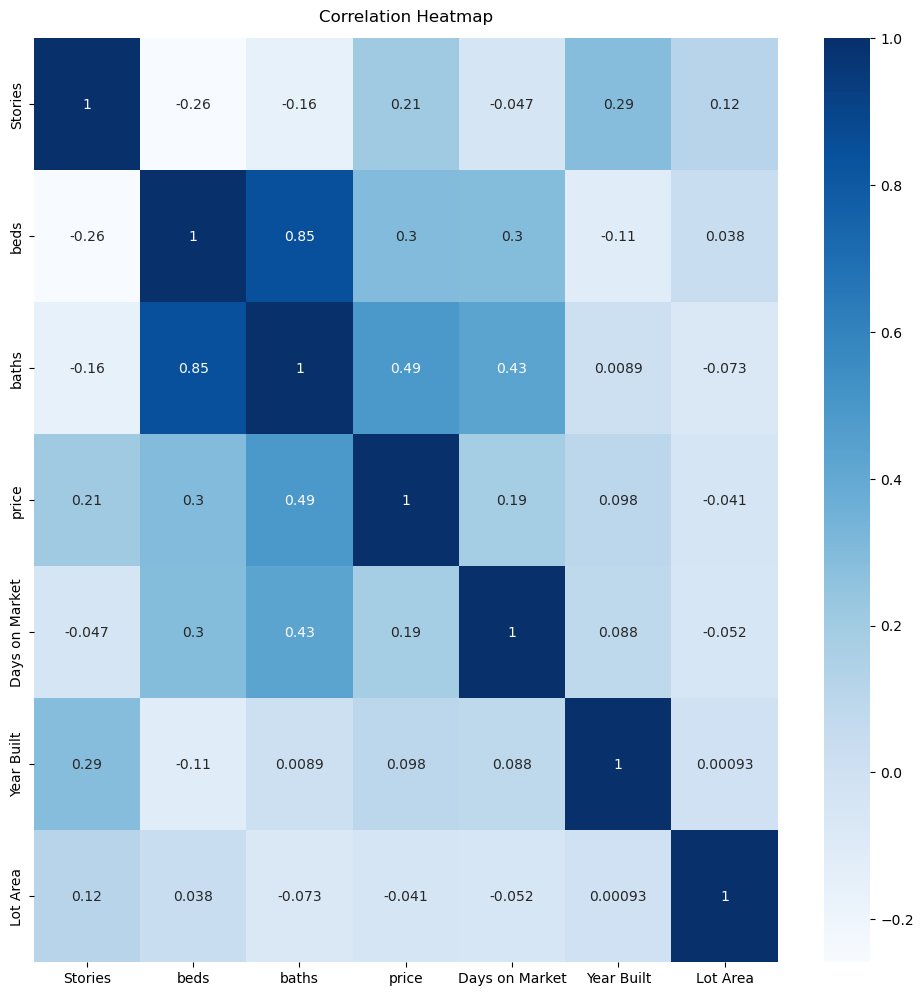

In [22]:
#correlation plot between property features
fig = plt.figure(figsize=(12, 12))
fig.patch.set_facecolor('white')
feature_heatmap = sns.heatmap(data.corr(), cmap="Blues", annot=True);

feature_heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

/var/folders/yj/q_gg81991dx6kj_zmbmk1w2c0000gn/T/ipykernel_65887/732263477.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()[['price']].sort_values(by='price', ascending=False)
/var/folders/yj/q_gg81991dx6kj_zmbmk1w2c0000gn/T/ipykernel_65887/732263477.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(data.corr()[['price']].sort_values(by='price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='Greens')


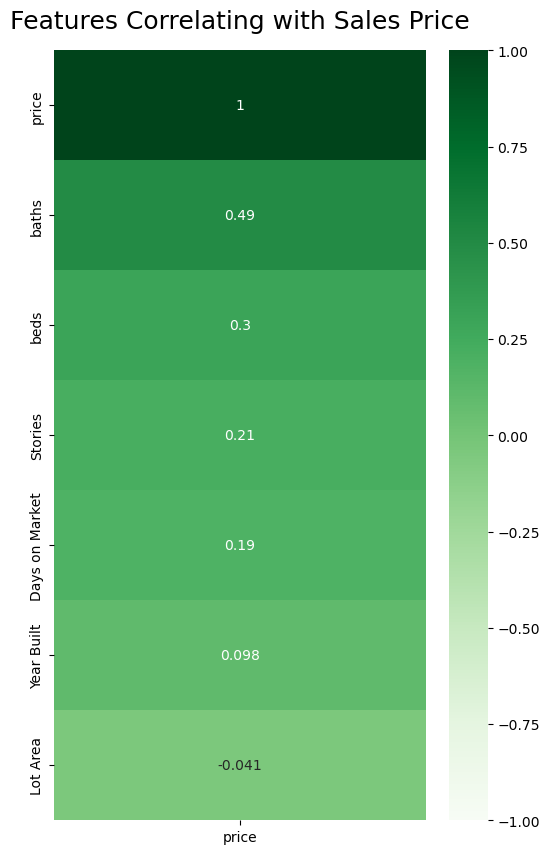

In [23]:
#plotting feature correlation between property price
data.corr()[['price']].sort_values(by='price', ascending=False)
fig = plt.figure(figsize=(6, 10))
fig.patch.set_facecolor('white')
heatmap = sns.heatmap(data.corr()[['price']].sort_values(by='price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='Greens')
heatmap.set_title('Features Correlating with Sales Price', fontdict={'fontsize':18}, pad=16);

In [24]:
#counting the number of properties in each borough
boroughs = ["Manhattan", "Staten Island", "Bronx", "Queens", "Brooklyn", "Other NYC"]
check = list(data["Borough"]).count("Manhattan")
count_per_borough = [list(data["Borough"]).count("Manhattan"),
                    list(data["Borough"]).count("Staten Island"), 
                    list(data["Borough"]).count("Bronx"), 
                    list(data["Borough"]).count("Queens"), 
                    list(data["Borough"]).count("Brooklyn"),
                    list(data["Borough"]).count("Other NYC")]
count_per_borough

[266, 124, 110, 332, 275, 21]

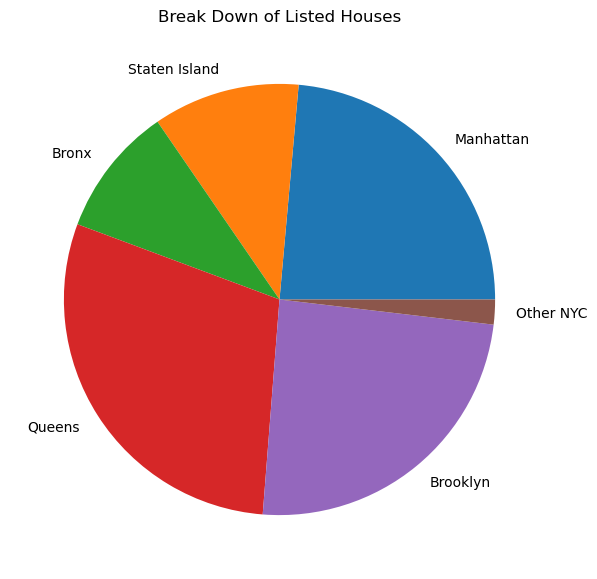

In [26]:
# Creating pie chart of the number of properties in each borough
fig = plt.figure(figsize =(10, 7))
fig.patch.set_facecolor('white')
plt.pie(count_per_borough, labels = boroughs)
plt.title("Borough Break Down of Listed Houses")
# show plot
plt.show()

In [33]:
#getting the average house price per borough
house_price_by_borough = {
  "Manhattan" : [], "Staten Island" : [], "Bronx" : [], "Queens" : [], "Brooklyn" : [], "Other NYC": []
}
too_expensive = []
for num, row in data.iterrows():
  if not math.isnan(row["price"]):
    if row["price"] > 5000000:
      too_expensive.append(row["price"])
    else:
      house_price_by_borough[row["Borough"]].append(row["price"])

[sum(arr) for (name, arr) in house_price_by_borough.items()]

[358623498.0, 93561352.0, 44994368.0, 278074805.0, 385639927.0, 16553795.0]

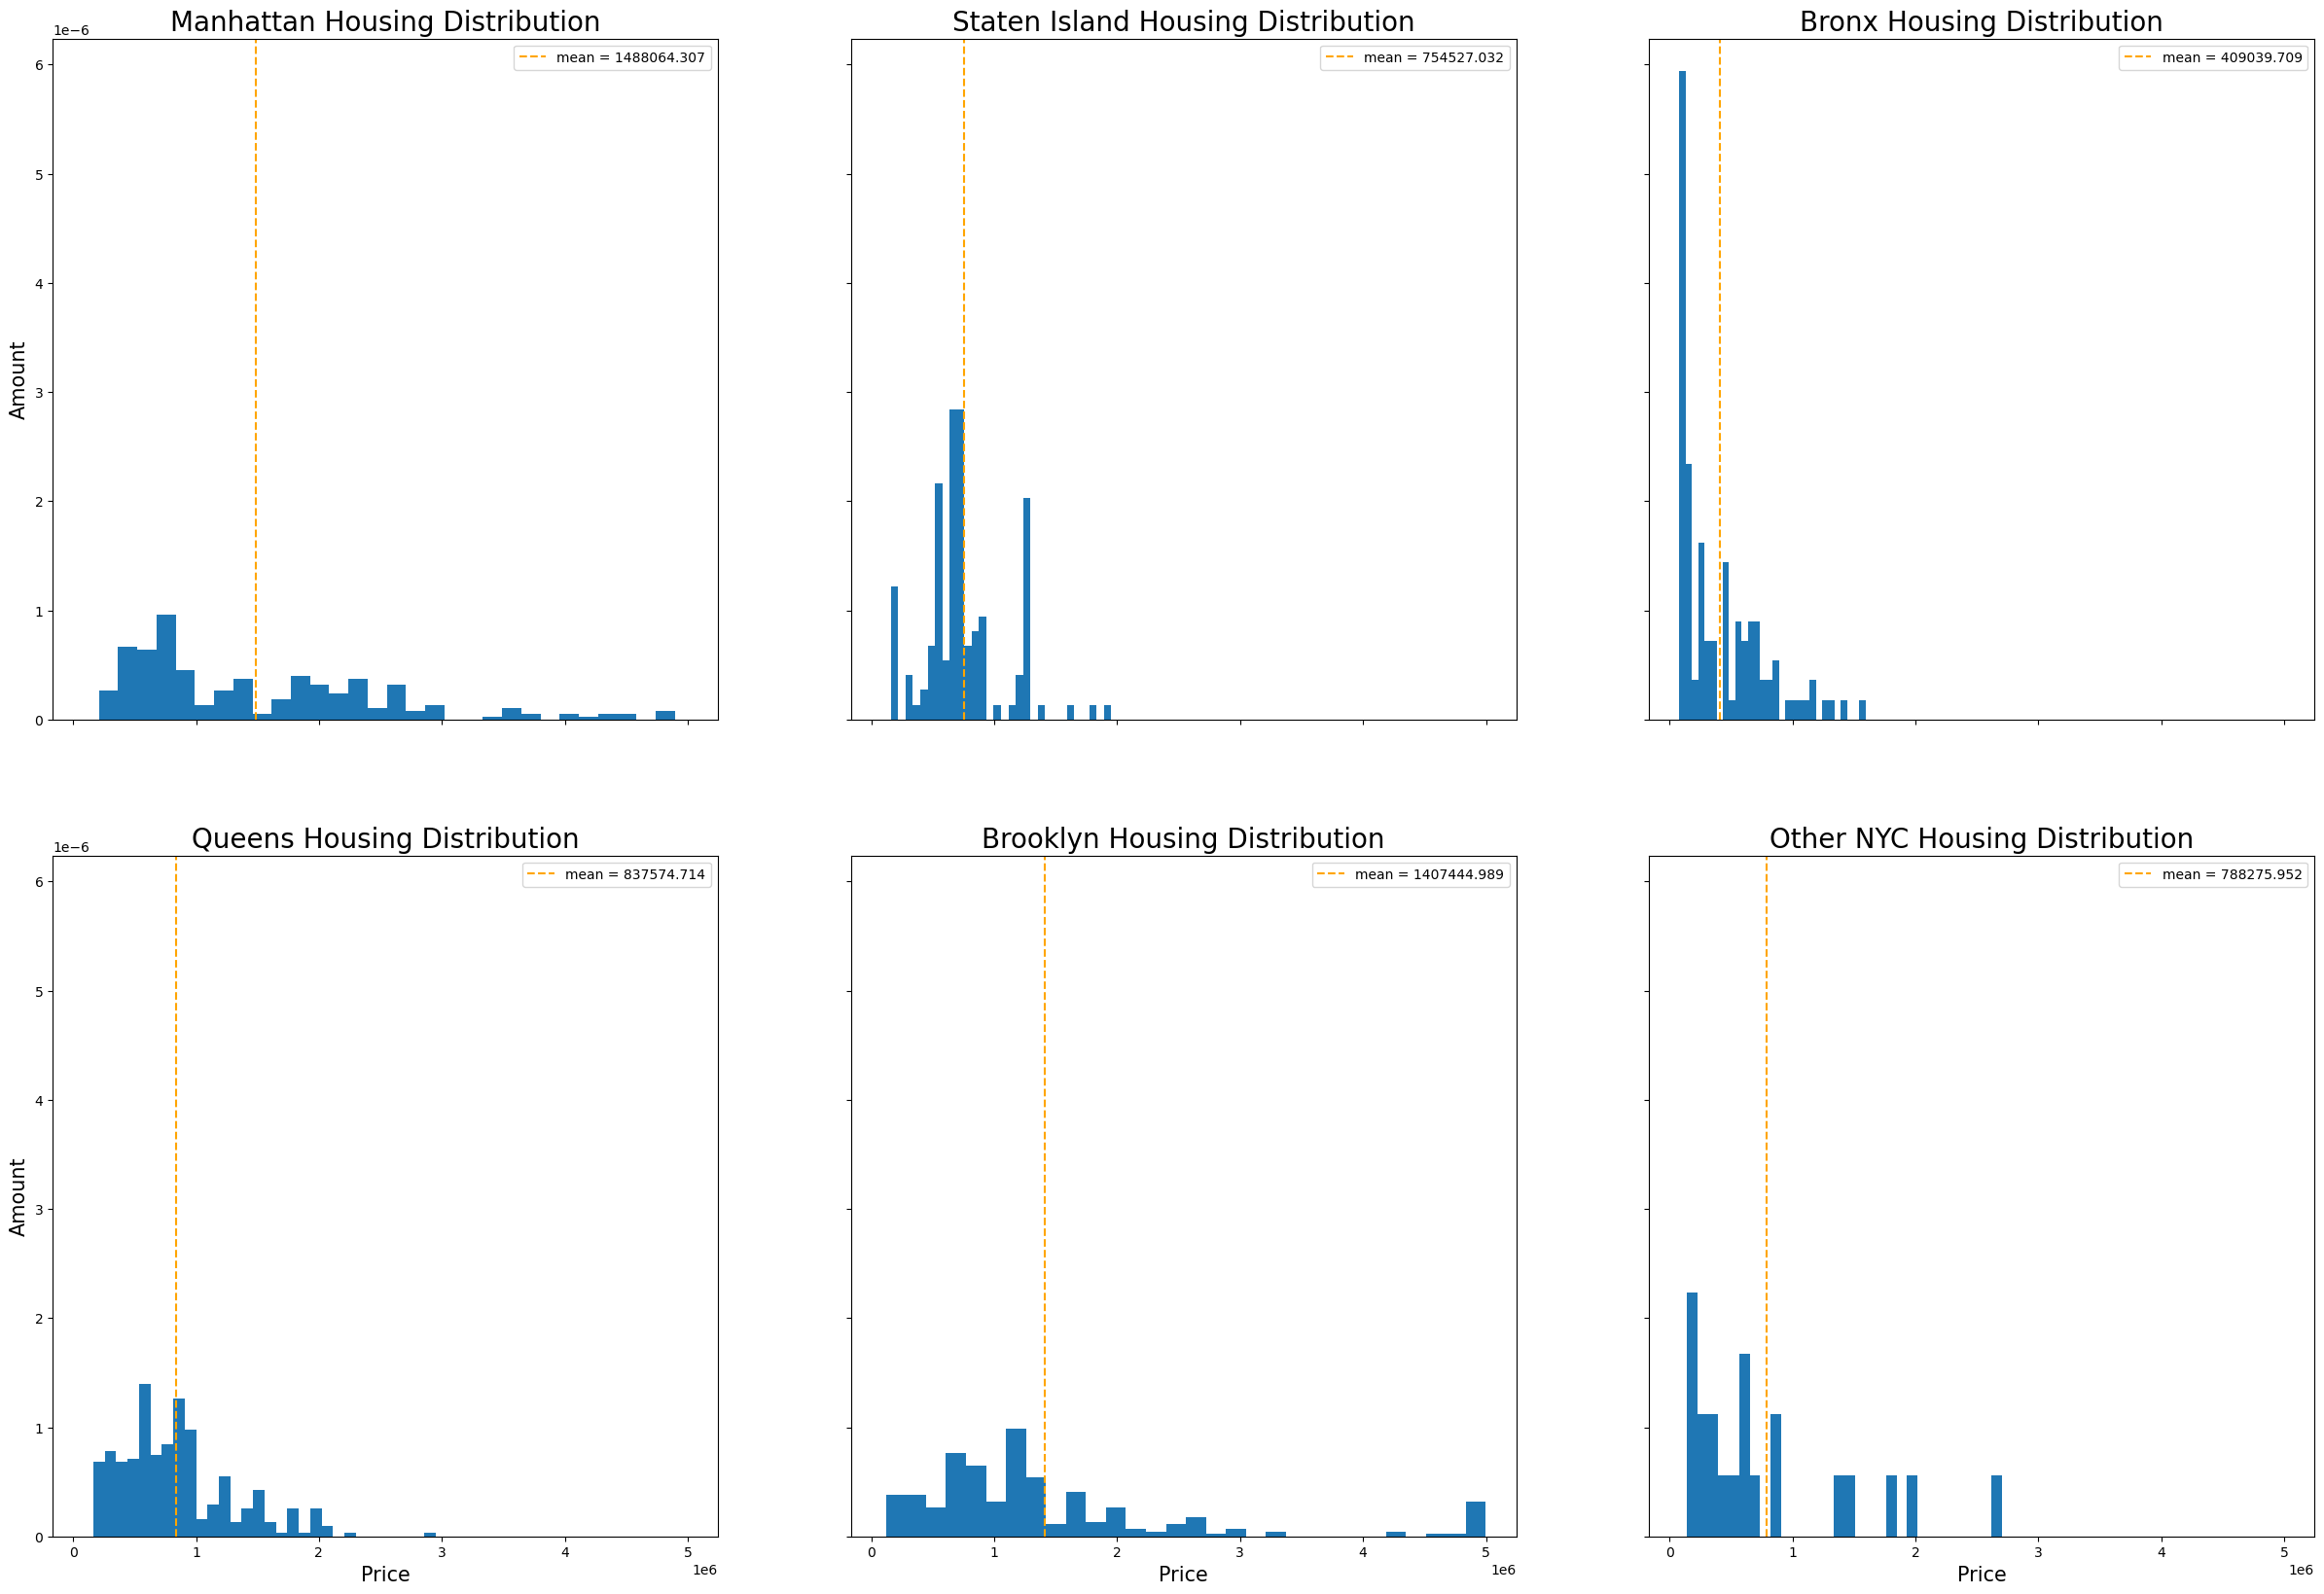

In [34]:
#NEED TO BE FORMATTED BETTER
#distribution of house prices in each Borough
fig, ax = plt.subplots(2,3, figsize=[30, 20], sharex = True, sharey = True)
[ax[1,i].set_xlabel("Price", fontsize=15) for i in range(3)]
[ax[i,0].set_ylabel("Amount", fontsize=15) for i in range(2)]
ax[0, 0].set_title("Manhattan Housing Distribution", fontsize=20); ax[0,0].hist(house_price_by_borough["Manhattan"], bins=30, density=True); ax[0,0].axvline(np.mean(house_price_by_borough["Manhattan"]), ls="--",c="orange"); ax[0,0].legend(["mean = " + str(round(np.mean(house_price_by_borough["Manhattan"]), 3))])
ax[0, 1].set_title("Staten Island Housing Distribution", fontsize=20); ax[0,1].hist(house_price_by_borough["Staten Island"], bins=30, density=True); ax[0,1].axvline(np.mean(house_price_by_borough["Staten Island"]), ls="--",c="orange"); ax[0,1].legend(["mean = " + str(round(np.mean(house_price_by_borough["Staten Island"]), 3))])
ax[0, 2].set_title("Bronx Housing Distribution", fontsize=20); ax[0,2].hist(house_price_by_borough["Bronx"], bins=30, density=True); ax[0,2].axvline(np.mean(house_price_by_borough["Bronx"]), ls="--",c="orange"); ax[0,2].legend(["mean = " + str(round(np.mean(house_price_by_borough["Bronx"]), 3))])
ax[1, 0].set_title("Queens Housing Distribution", fontsize=20); ax[1,0].hist(house_price_by_borough["Queens"], bins=30, density=True); ax[1,0].axvline(np.mean(house_price_by_borough["Queens"]), ls="--",c="orange"); ax[1,0].legend(["mean = " + str(round(np.mean(house_price_by_borough["Queens"]), 3))])
ax[1, 1].set_title("Brooklyn Housing Distribution", fontsize=20); ax[1,1].hist(house_price_by_borough["Brooklyn"], bins=30, density=True); ax[1,1].axvline(np.mean(house_price_by_borough["Brooklyn"]), ls="--",c="orange"); ax[1,1].legend(["mean = " + str(round(np.mean(house_price_by_borough["Brooklyn"]), 3))])
ax[1, 2].set_title("Other NYC Housing Distribution", fontsize=20); ax[1,2].hist(house_price_by_borough["Other NYC"], bins=30, density=True); ax[1,2].axvline(np.mean(house_price_by_borough["Other NYC"]), ls="--",c="orange"); ax[1,2].legend(["mean = " + str(round(np.mean(house_price_by_borough["Other NYC"]), 3))])